<a href="https://colab.research.google.com/github/Samikshaa415/Weed-detection/blob/main/miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data Augumentation
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_dir = '/content/drive/MyDrive/Miniprojectdataset'

In [ ]:
augmentation_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
image_files = [os.path.join(dataset_dir, filename) for filename in os.listdir(dataset_dir) if filename.endswith('.jpg')]

In [ ]:
augmented_dir = os.path.join(dataset_dir, 'Augmented1')
os.makedirs(augmented_dir, exist_ok=True)

In [ ]:
for img_file in image_files:
    img = load_img(img_file)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    i = 0
    for batch in augmentation_datagen.flow(img_array, batch_size=1):
        augmented_img = array_to_img(batch[0], data_format='channels_last')
        augmented_filename = os.path.splitext(os.path.basename(img_file))[0] + f'_aug_{i}.jpg'
        augmented_img.save(os.path.join(augmented_dir, augmented_filename))

        i += 1
        if i >= 3:
            break

In [ ]:
image_files = [os.path.join(dataset_dir, filename) for filename in os.listdir(dataset_dir) if filename.endswith('.jpg')]
augmented_dir = os.path.join(dataset_dir, 'Augmented 2')
os.makedirs(augmented_dir, exist_ok=True)

In [ ]:
for img_file in image_files:
    img = load_img(img_file)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    i = 0
    for batch in augmentation_datagen.flow(img_array, batch_size=1):
        augmented_img = array_to_img(batch[0], data_format='channels_last')
        augmented_filename = os.path.splitext(os.path.basename(img_file))[0] + f'_aug_{i}.jpg'
        augmented_img.save(os.path.join(augmented_dir, augmented_filename))

        i += 1
        if i >= 6:
            break

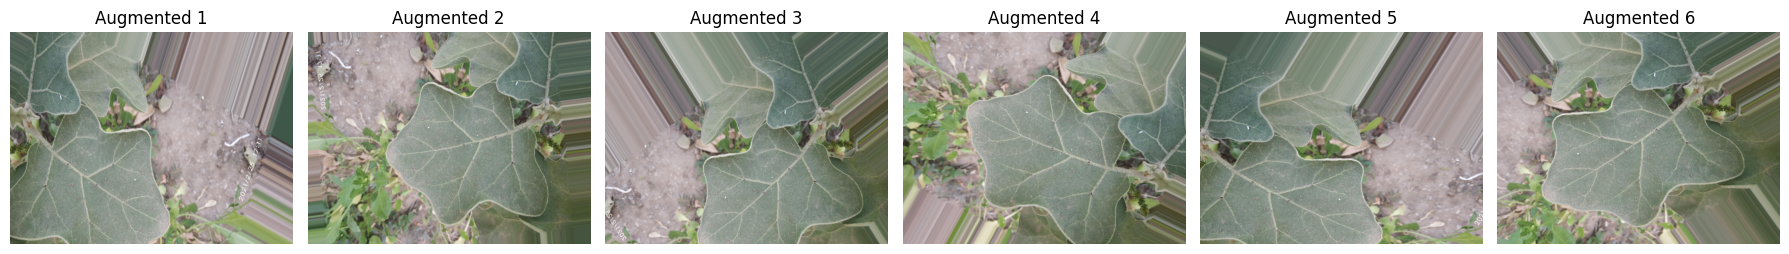

In [ ]:
# Display the first 6 augmented images
sample_augmented_images = os.listdir(augmented_dir)[:6]
plt.figure(figsize=(18, 8))
for i, image_filename in enumerate(sample_augmented_images):
    img = load_img(os.path.join(augmented_dir, image_filename))
    plt.subplot(1, 6, i + 1)
    plt.imshow(img)
    plt.title(f'Augmented {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#RESNET-50

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

In [ ]:
# Data Preprocessing
# Assuming you have your dataset organized in a directory structure, e.g., 'data/train' and 'data/validation'.
train_data_dir = '/content/drive/MyDrive/Miniprojectdataset'
validation_data_dir = '/content/drive/MyDrive/Miniprojectdataset'


In [ ]:
# Split Data
batch_size = 32
image_size = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 354 images belonging to 2 classes.
Found 87 images belonging to 2 classes.


In [ ]:
# Model Architecture
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Transfer Learning
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Customize the Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the Model
epochs = 10  # You can increase this for better results
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/10
11/11 [==============================] - 111s 9s/step - loss: 0.7546 - accuracy: 0.5373 - val_loss: 0.7672 - val_accuracy: 0.6406
Epoch 2/10
11/11 [==============================] - 99s 9s/step - loss: 0.6754 - accuracy: 0.6708 - val_loss: 0.6131 - val_accuracy: 0.7031
Epoch 3/10
11/11 [==============================] - 99s 10s/step - loss: 0.6619 - accuracy: 0.6615 - val_loss: 0.6223 - val_accuracy: 0.7031
Epoch 4/10
11/11 [==============================] - 109s 10s/step - loss: 0.6328 - accuracy: 0.6708 - val_loss: 0.6339 - val_accuracy: 0.6719
Epoch 5/10
11/11 [==============================] - 105s 9s/step - loss: 0.6370 - accuracy: 0.6705 - val_loss: 0.6230 - val_accuracy: 0.6875
Epoch 6/10
11/11 [==============================] - 99s 9s/step - loss: 0.6327 - accuracy: 0.6739 - val_loss: 0.6581 - val_accuracy: 0.6406
Epoch 7/10
11/11 [==============================] - 101s 9s/step - loss: 0.6296 - accuracy: 0.6739 - val_loss: 0.6935 - val_accuracy: 0.6094
Epoch 8/10
11/

In [ ]:
# Fine-tuning (optional)
for layer in base_model.layers[:100]:  # Fine-tune some layers if needed
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.00001),  # Adjust learning rate if needed
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/10
11/11 [==============================] - 258s 22s/step - loss: 0.6572 - accuracy: 0.6429 - val_loss: 0.6606 - val_accuracy: 0.6562
Epoch 2/10
11/11 [==============================] - 235s 21s/step - loss: 0.6608 - accuracy: 0.6429 - val_loss: 0.7672 - val_accuracy: 0.3438
Epoch 3/10
11/11 [==============================] - 234s 21s/step - loss: 0.6441 - accuracy: 0.6677 - val_loss: 0.8165 - val_accuracy: 0.3125
Epoch 4/10
11/11 [==============================] - 231s 21s/step - loss: 0.6614 - accuracy: 0.6491 - val_loss: 0.8113 - val_accuracy: 0.2656
Epoch 5/10
11/11 [==============================] - 231s 21s/step - loss: 0.6331 - accuracy: 0.6739 - val_loss: 0.7199 - val_accuracy: 0.2969
Epoch 6/10
11/11 [==============================] - 235s 21s/step - loss: 0.6524 - accuracy: 0.6615 - val_loss: 0.6772 - val_accuracy: 0.6875
Epoch 7/10
11/11 [==============================] - 232s 23s/step - loss: 0.6260 - accuracy: 0.6615 - val_loss: 0.7152 - val_accuracy: 0.3438
Epoch 

In [ ]:
# Evaluation
test_data_dir = '/content/drive/MyDrive/Miniprojectdataset'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

eval_result = model.evaluate(test_generator)
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

Found 808 images belonging to 2 classes.
26/26 [==============================] - 209s 8s/step - loss: 0.5643 - accuracy: 0.7500
Test Loss: 0.5642671585083008
Test Accuracy: 0.75


In [ ]:
# Inference
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        return "Weed"
    else:
        return "No Weed"

In [ ]:
# Example usage:
image_path_to_predict = '/content/drive/MyDrive/Miniprojectdataset/73.jpg'
result = predict_image(image_path_to_predict)
print(f"Prediction for {image_path_to_predict}: {result}")

# Post-processing (if needed)
# You can add post-processing steps here, like thresholding or additional analysis.

# Save the model for later use
model.save('weed_detection_model.h5')

1/1 [==============================] - 0s 174ms/step
Prediction for /content/drive/MyDrive/Miniprojectdataset/73.jpg: Weed


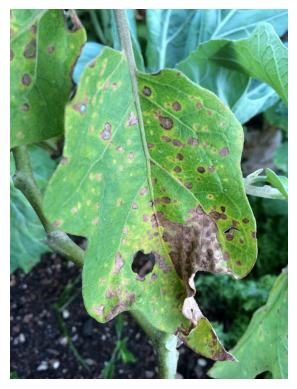

In [ ]:
#Displaying the image
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Miniprojectdataset/73.jpg'
img = cv2.imread(image_path)

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
# Example usage:
image_path_to_predict = '/content/drive/MyDrive/Miniprojectdataset/augmented 2/70_aug_0.jpg'
result = predict_image(image_path_to_predict)
print(f"Prediction for {image_path_to_predict}: {result}")

# Post-processing (if needed)
# You can add post-processing steps here, like thresholding or additional analysis.

# Save the model for later use
model.save('weed_detection_model.h5')

1/1 [==============================] - 2s 2s/step
Prediction for /content/drive/MyDrive/Miniprojectdataset/augmented 2/25_aug_0.jpg: No Weed


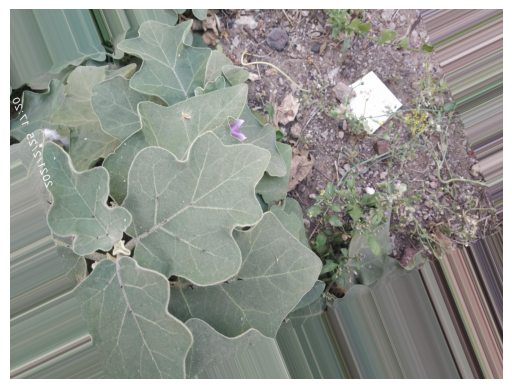

In [ ]:
#Displaying the image
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Miniprojectdataset/augmented 2/70_aug_0.jpg'
img = cv2.imread(image_path)

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()
